3. Создание нейронной сети при помощи пакета torch. Dataset и Dataloader.

1. Автоматическое дифференцирование в torch
1.1 Воспользовавшись классами Neuron и MSELoss из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет torch, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

torch.manual_seed(63)

In [2]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [3]:
X[:5], X.shape

(tensor([[ 0.1858,  1.0342,  2.1270,  0.6816],
         [ 1.6371, -0.3344, -1.0270,  0.5785],
         [ 0.1018, -0.2460, -0.4623,  0.1848],
         [-0.9377,  1.6774, -0.1218,  0.6435],
         [-0.2365, -1.0124,  0.1500,  1.6193]]),
 torch.Size([100, 4]))

In [4]:
y[:5], y.shape

(tensor([265.6099, -48.7996, -53.0864, 129.3543, -91.1299]), torch.Size([100]))

In [5]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        self.weights = torch.randn(n_inputs, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

    def forward(self, inputs):
        return torch.matmul(inputs, self.weights.T) + self.bias

    def backward(self, dvalue):
        self.dweights = dvalue
        self.dinput = dvalue * self.weights
        self.dbias = dvalue

        return self.dweights, self.dbias

    def parameters(self):
        return self.weights, self.bias


class MSELoss:
    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()

        return mean_diff

    def backward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_doubled = 2 * diff
        differences_div = differences_doubled / y_pred.size(0)
        return differences_div

In [6]:
neuron = Neuron(X.shape[1])
mse = MSELoss()
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.1)

In [7]:
for epoch in range(16):
    y_pred = neuron.forward(X)
    loss = mse.forward(y_pred=y_pred, y_true=y)
    print('Loss: ', loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

neuron.weights, coef

Loss:  19629.73046875
Loss:  11229.9013671875
Loss:  6477.447265625
Loss:  3771.81103515625
Loss:  2220.16162109375
Loss:  1322.7181396484375
Loss:  798.5595092773438
Loss:  489.0141296386719
Loss:  303.9436340332031
Loss:  191.79750061035156
Loss:  122.86112976074219
Loss:  79.8504867553711
Loss:  52.60813903808594
Loss:  35.095458984375
Loss:  23.676132202148438
Loss:  16.130352020263672


C:\Users\Damir\AppData\Local\Temp\ipykernel_14584\869744184.py:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3281.)
  return torch.matmul(inputs, self.weights.T) + self.bias


(tensor([32.0448, 99.0748, 69.2859,  4.7968], requires_grad=True),
 array([34.00063774, 99.53831823, 72.00857379,  3.94441292]))

1.2 Воспользовавшись классами Linear и MSELoss из задачи 2.1.4 и 2.3.1, ReLU из 2.2.1 и автоматическим дифференцированием,
которое предоставляет torch, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск.
Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные
значения.

In [8]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons, requires_grad=True)
        self.biases = torch.randn(n_neurons, requires_grad=True)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return (inputs @ self.weights) + self.biases

    def parameters(self):
        return self.weights, self.biases


class MSELoss:
    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()

        return mean_diff

    def backward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_doubled = 2 * diff
        differences_div = differences_doubled / y_pred.size(0)
        return differences_div


class ReLU:
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.where(inputs > 0, inputs, 0)

In [9]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [10]:
X[:5], X.shape

(tensor([[0.0000],
         [0.0101],
         [0.0202],
         [0.0303],
         [0.0404]]),
 torch.Size([100, 1]))

In [11]:
y[:5], y.shape

(tensor([[0.0558],
         [0.1185],
         [0.1298],
         [0.2740],
         [0.2868]]),
 torch.Size([100, 1]))

In [12]:
layer_1 = Linear(X.shape[1], 100)
layer_2 = Linear(100, y.shape[1])

relu = ReLU()
mse = MSELoss()

optimizer = torch.optim.SGD((*layer_1.parameters(), *layer_2.parameters()), lr=0.001)

In [13]:
losses = torch.empty(1000)
for epoch in range(1000):
    y_pred = layer_2.forward(relu.forward(layer_1.forward(X)))

    loss = mse.forward(y_pred=y_pred, y_true=y)
    optimizer.zero_grad()
    loss.backward()
    losses[epoch] = loss.item()
    optimizer.step()

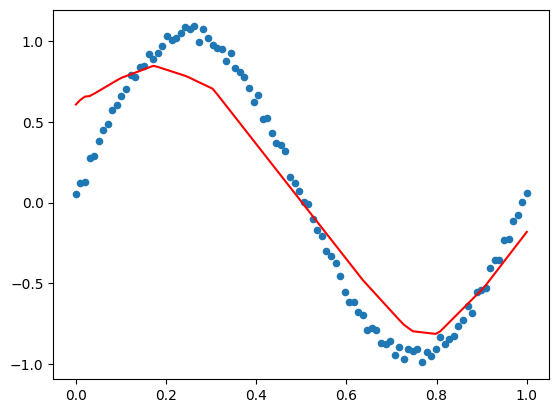

In [14]:
_, ax = plt.subplots(1)

ax.scatter(X, y, s=20)
res = layer_2.forward(relu.forward(layer_1.forward(X)))
ax.plot(X, res.detach(), c='r')
plt.show()

2. Алгоритмы оптимизации в torch.optim

In [15]:
import torch.optim as optim

2.1 Решить задачу 1.1, воспользовавшись оптимизатором optim.SDG для применения стохастического градиентого спуска

In [16]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [17]:
class Neuron:
    def __init__(self, n_inputs):
        self.weights = torch.randn(n_inputs, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

    def forward(self, inputs):
        return torch.matmul(inputs, self.weights.T) + self.bias

    def backward(self, bvalue):
        self.bweights = bvalue
        self.binput = bvalue * self.weights
        self.bbias = bvalue

        return self.bweights, self.bbias

    def parameters(self):
        return self.weights, self.bias


class MSELoss:
    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()

        return mean_diff

    def backward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_doubled = 2 * diff
        differences_div = differences_doubled / y_pred.size(0)
        return differences_div

In [18]:
neuron = Neuron(X.shape[1])
mse = MSELoss()
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.1)

In [19]:
for epoch in range(16):
    y_pred = neuron.forward(X)
    loss = mse.forward(y_pred=y_pred, y_true=y)
    print('Loss: ', loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

neuron.weights, coef

Loss:  25251.39453125
Loss:  13737.8828125
Loss:  7572.724609375
Loss:  4238.8935546875
Loss:  2414.66259765625
Loss:  1402.40625
Loss:  831.561279296875
Loss:  503.7422790527344
Loss:  311.72296142578125
Loss:  196.87913513183594
Loss:  126.7230453491211
Loss:  82.96717834472656
Loss:  55.135860443115234
Loss:  37.1121940612793
Loss:  25.251317977905273
Loss:  17.33649253845215


(tensor([61.0943, 74.3759, 44.2164, 88.4188], requires_grad=True),
 array([61.68731618, 73.995218  , 47.15467193, 90.30218618]))

2.2 Решить задачу 1.2, воспользовавшись оптимизатором optim.Adam для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [20]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons, requires_grad=True)
        self.biases = torch.randn(n_neurons, requires_grad=True)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return (inputs @ self.weights) + self.biases

    def parameters(self):
        return self.weights, self.biases


class MSELoss:
    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()

        return mean_diff

    def backward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_doubled = 2 * diff
        differences_div = differences_doubled / y_pred.size(0)
        return differences_div


class ReLU:
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.where(inputs > 0, inputs, 0)

In [21]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [22]:
layer_1 = Linear(X.shape[1], 100)
layer_2 = Linear(100, y.shape[1])

relu = ReLU()
mse = MSELoss()

optimizer = torch.optim.Adam((*layer_1.parameters(), *layer_2.parameters()), lr=0.001)

In [23]:
losses = torch.empty(1000)
for epoch in range(1000):
    y_pred = layer_2.forward(relu.forward(layer_1.forward(X)))

    loss = mse.forward(y_pred=y_pred, y_true=y)
    optimizer.zero_grad()
    loss.backward()
    losses[epoch] = loss.item()
    optimizer.step()

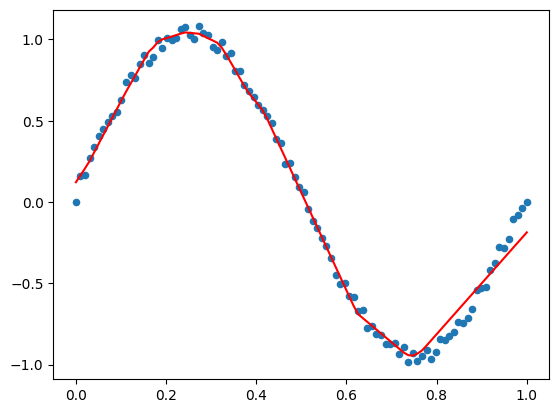

In [24]:
predicts = layer_2.forward(relu.forward(layer_1.forward(X)))
_, ax = plt.subplots(1)

ax.scatter(X, y, s=20)
ax.plot(X, predicts.detach(), c='r')
plt.show()

## 3. Построение сетей при помощи `torch.nn`

In [25]:
import torch.nn as nn

3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim`

In [26]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [27]:
class Net(nn.Module):
    def __init__(self, neurons):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(1, neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x


neuron = Net(15)
optimizer = optim.Adam(neuron.parameters(), lr=0.001)
mse = torch.nn.MSELoss()

Epoch 0 loss: 0.7126411199569702
Epoch 1000 loss: 0.2038809210062027
Epoch 2000 loss: 0.1993308663368225
Epoch 3000 loss: 0.19641278684139252
Epoch 4000 loss: 0.18777506053447723
Epoch 5000 loss: 0.15909060835838318
Epoch 6000 loss: 0.0668056532740593
Epoch 7000 loss: 0.005809516180306673
Epoch 8000 loss: 0.0011873355833813548


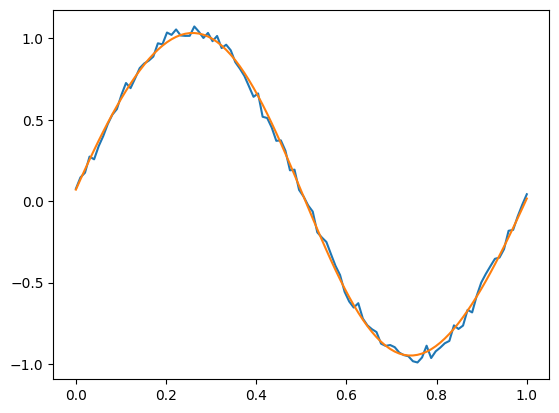

In [28]:
for epoch in range(9000):
    optimizer.zero_grad()
    y_pred = neuron.forward(X)
    loss = mse.forward(y_pred, y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} loss: {loss}")

with torch.no_grad():
    plt.plot(X, y)
    plt.plot(X, neuron(X).detach().numpy())

3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim`

In [29]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [30]:
model = nn.Sequential(
    nn.Linear(1, 5),
    nn.Tanh(),
    nn.Linear(5, 1),
    nn.Tanh(),
    nn.Linear(1, 5),
    nn.Tanh(),
    nn.Linear(5, 1)
)
optimizer = optim.Adam(model.parameters(), lr=0.01)
guas = torch.nn.GaussianNLLLoss()

losses = []
for epoch in range(5000):
    optimizer.zero_grad()

    y_pred = model.forward(X)
    var = torch.ones(y_pred.shape[0], y_pred.shape[1], requires_grad=True)
    loss = guas(y_pred, y, var)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()

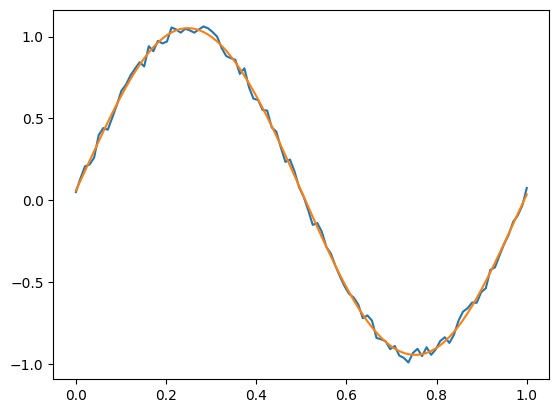

In [31]:
with torch.no_grad():
  plt.plot(X, y)
  plt.plot(X, model(X))

3.3 Решить задачу классификации. Датасет: Breast Cancer Wisconsin
1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim`

In [32]:
from sklearn import datasets

dataset = datasets.load_breast_cancer()

X = torch.from_numpy(dataset.data).to(torch.float32)
y = torch.from_numpy(dataset.target).to(torch.float32).view(-1, 1)

In [33]:
X.shape

torch.Size([569, 30])

In [34]:
y.shape

torch.Size([569, 1])

In [35]:
model = nn.Sequential(
    nn.Linear(X.size(1), 50),
    nn.Tanh(),
    nn.Linear(50, y.size(1)),
    nn.Tanh(),
)
hloss = nn.HuberLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
m = nn.LogSoftmax()

for epoch in range(1000):
    optimizer.zero_grad()

    y_pred = model(X)
    loss = hloss(y_pred, y)
    loss.backward()

    optimizer.step()

    if epoch % 100 == 0:
        print(f"Loss: {loss.item()}")

Loss: 0.6722543239593506
Loss: 0.06496413052082062
Loss: 0.049678072333335876
Loss: 0.04164082184433937
Loss: 0.035400375723838806
Loss: 0.03164278715848923
Loss: 0.028959952294826508
Loss: 0.02501884289085865
Loss: 0.02388002909719944
Loss: 0.023097503930330276


## 4. Datasets and dataloaders

In [36]:
from torch.utils.data import Dataset, DataLoader

4.1 Создать датасет, поставляющий данные из задачи 1.2.

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.1 (или 3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [37]:
class SinDataset(Dataset):
    def __init__(self):
        self.X = torch.linspace(0, 1, 100).view(-1, 1)
        self.y = torch.sin(2 * np.pi * self.X) + 0.1 * torch.rand(self.X.size())

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

n_neurons = 10
model = nn.Sequential(
    nn.Linear(1, n_neurons),
    nn.Tanh(),
    nn.Linear(n_neurons, 1)
)

In [38]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
hloss = torch.nn.HuberLoss()
dataloader = DataLoader(SinDataset(), batch_size=10)

for epoch in range(10000):
    X_dl, y_dl = next(iter(dataloader))
    optimizer.zero_grad()
    y_pred = model.forward(X_dl)
    loss = hloss(y_pred, y_dl)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Loss: {loss.item()}")

Loss: 0.3079451322555542
Loss: 0.043050430715084076
Loss: 0.01199752651154995
Loss: 0.01114640198647976
Loss: 0.010499173775315285
Loss: 0.009552916511893272
Loss: 0.008284921757876873
Loss: 0.006713560316711664
Loss: 0.004907613154500723
Loss: 0.0030633111018687487


4.2 Предсказание цен алмазов

4.2.1 Создайте датасет на основе файла diamonds.csv.

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`).

4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке.


In [39]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings("ignore")

In [40]:
class DiamondsDataset(Dataset):
    def __init__(self, data):
        super().__init__()
        self.data = pd.read_csv(data, index_col=[0])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        self.X = torch.FloatTensor(self.data.drop(columns=["price"]).select_dtypes(["number"]).values)
        self.y = torch.FloatTensor(self.data["price"].values)
        return self.X[idx], self.y[idx]

In [41]:
dataset = DiamondsDataset("diamonds.csv")
print(dataset[:10])

(tensor([[61.5000, 55.0000,  3.9500,  3.9800,  2.4300],
        [59.8000, 61.0000,  3.8900,  3.8400,  2.3100],
        [56.9000, 65.0000,  4.0500,  4.0700,  2.3100],
        [62.4000, 58.0000,  4.2000,  4.2300,  2.6300],
        [63.3000, 58.0000,  4.3400,  4.3500,  2.7500],
        [62.8000, 57.0000,  3.9400,  3.9600,  2.4800],
        [62.3000, 57.0000,  3.9500,  3.9800,  2.4700],
        [61.9000, 55.0000,  4.0700,  4.1100,  2.5300],
        [65.1000, 61.0000,  3.8700,  3.7800,  2.4900],
        [59.4000, 61.0000,  4.0000,  4.0500,  2.3900]]), tensor([326., 326., 327., 334., 335., 336., 336., 337., 337., 338.]))


In [42]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train, test = torch.utils.data.random_split(dataset, [train_size, test_size])

diamonds_dataloader_train = DataLoader(train, batch_size=256)
diamonds_dataloader_test = DataLoader(test, batch_size=256)

In [43]:
class Model(nn.Module):
    def __init__(self, n_neurons):
        super(Model, self).__init__()
        self.fc1 = torch.nn.Linear(n_neurons, 3)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(3, 1)
        # self.act2 = torch.nn.Tanh()
        # self.fc3 = torch.nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        # x = self.act2(x)
        # x = self.fc3(x)
        return x

neuron = Model(5)
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.001, momentum=0.9)
huber = torch.nn.HuberLoss()

loss_list = []
for epoch in range(50):
    X_dl, y_dl = next(iter(diamonds_dataloader_train))
    optimizer.zero_grad()

    y_pred = neuron.forward(X_dl)
    loss = huber(y_pred, y_dl)
    loss_list.append(loss.item())
    loss.backward()
    optimizer.step()

    print(f"Loss: {loss}")

Loss: 3670.60107421875
Loss: 3670.585205078125
Loss: 3670.564453125
Loss: 3670.546875
Loss: 3670.53125
Loss: 3670.51513671875
Loss: 3670.49658203125
Loss: 3670.47705078125
Loss: 3670.45458984375
Loss: 3670.430908203125
Loss: 3670.40576171875
Loss: 3670.37890625
Loss: 3670.3505859375
Loss: 3670.32080078125
Loss: 3670.29052734375
Loss: 3670.259033203125
Loss: 3670.22705078125
Loss: 3670.19384765625
Loss: 3670.16015625
Loss: 3670.12548828125
Loss: 3670.090087890625
Loss: 3670.05517578125
Loss: 3670.01953125
Loss: 3669.98291015625
Loss: 3669.94580078125
Loss: 3669.909912109375
Loss: 3669.871337890625
Loss: 3669.83447265625
Loss: 3669.796630859375
Loss: 3669.75830078125
Loss: 3669.72021484375
Loss: 3669.6826171875
Loss: 3669.64404296875
Loss: 3669.605224609375
Loss: 3669.56640625
Loss: 3669.52734375
Loss: 3669.48828125
Loss: 3669.44921875
Loss: 3669.409912109375
Loss: 3669.37060546875
Loss: 3669.33154296875
Loss: 3669.2919921875
Loss: 3669.251953125
Loss: 3669.21240234375
Loss: 3669.1723632

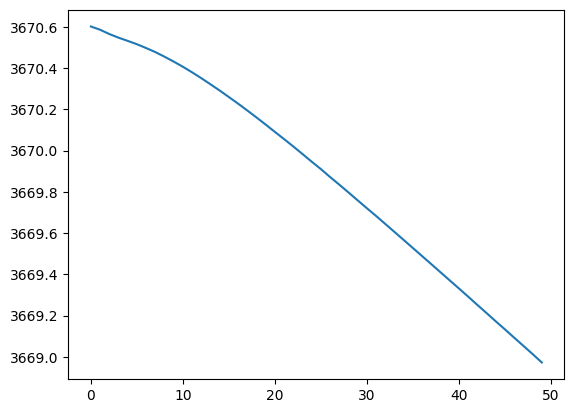

In [44]:
import matplotlib.pyplot as plt

with torch.no_grad():
  plt.plot(loss_list)

4.3 Модифицируйте метод `__init__` датасета из 4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [63]:
class DiamondsDataset(Dataset):
    def __init__(self, data, transform:callable =None):
        self.data = pd.read_csv(data, index_col = [0])
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        self.X = self.data.drop(columns=["price"])
        self.y = self.data["price"]
        sample = self.X.iloc[idx], self.y.iloc[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

In [64]:
from typing import List

class DropColsTransform:
    def __init__(self, drop: List[int]):
        self.drop = drop

    def __call__(self, sample):
        X, y = sample
        X = X.drop(X.index[self.drop], axis=0)
        return X, y

In [65]:
class ToTensorTransform:
  def __call__(self, sample):
    self.X, self.y = sample
    self.X = torch.FloatTensor(self.X.astype("float64").values)
    self.y = torch.FloatTensor([self.y])
    return self.X, self.y

In [69]:
from torchvision import transforms

drop = DropColsTransform(drop=[0, 1, 2, 3])
to_tensor = ToTensorTransform()
dataset = DiamondsDataset('diamonds.csv', transform=transforms.Compose([drop, to_tensor]))


In [70]:
train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])

diamonds_dataloader_train = DataLoader(train, batch_size=256)
diamonds_dataloader_test = DataLoader(test, batch_size=256)

In [90]:
model = torch.nn.Sequential(
    torch.nn.Linear(4, 12),
    torch.nn.Tanh(),
    torch.nn.Linear(12, 6),
    torch.nn.Tanh(),
    torch.nn.Linear(6, 1)
)
neuron = model
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.01, momentum=0.9)
huber = torch.nn.MSELoss()

loss_list = []
for epoch in range(30):
    X_dl, y_dl = next(iter(diamonds_dataloader_train))
    optimizer.zero_grad()
    y_pred = neuron.forward(X_dl)
    loss = huber(y_pred, y_dl)
    loss_list.append(loss.item())
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch} \t Loss: {loss.item()}")

Epoch 0 	 Loss: 32659868.0
Epoch 1 	 Loss: 31129426.0
Epoch 2 	 Loss: 26387536.0
Epoch 3 	 Loss: 21106850.0
Epoch 4 	 Loss: 17769288.0
Epoch 5 	 Loss: 17422174.0
Epoch 6 	 Loss: 19410900.0
Epoch 7 	 Loss: 22034782.0
Epoch 8 	 Loss: 23614596.0
Epoch 9 	 Loss: 23346550.0
Epoch 10 	 Loss: 21545688.0
Epoch 11 	 Loss: 19269954.0
Epoch 12 	 Loss: 17635204.0
Epoch 13 	 Loss: 17230888.0
Epoch 14 	 Loss: 17916638.0
Epoch 15 	 Loss: 19031564.0
Epoch 16 	 Loss: 19830690.0
Epoch 17 	 Loss: 19881610.0
Epoch 18 	 Loss: 19225752.0
Epoch 19 	 Loss: 18266286.0
Epoch 20 	 Loss: 17492066.0
Epoch 21 	 Loss: 17210194.0
Epoch 22 	 Loss: 17422584.0
Epoch 23 	 Loss: 17882420.0
Epoch 24 	 Loss: 18267400.0
Epoch 25 	 Loss: 18358782.0
Epoch 26 	 Loss: 18133392.0
Epoch 27 	 Loss: 17737994.0
Epoch 28 	 Loss: 17381462.0
Epoch 29 	 Loss: 17215676.0


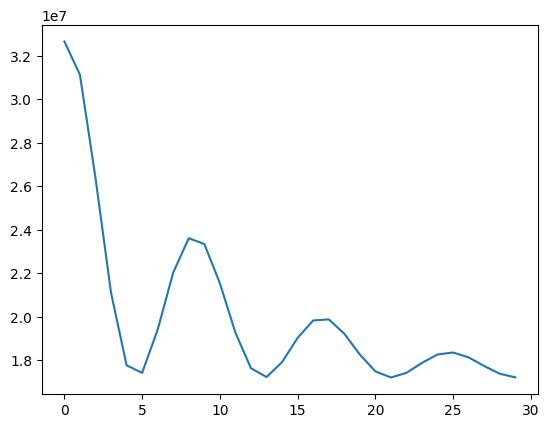

In [91]:
with torch.no_grad():
  plt.plot(loss_list)